In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("./FPData2.csv")
df.columns = ['Country', 'year', 'ladder', 'gdp', 'support', 'life_expec', 'freedom', 'generosity','corruption','positive', 'negative']
y = df.groupby('Country').count()
less = y[y['year'] <= 10].index.tolist()
df_update = df[~df['Country'].isin(less)]
year_list = range(2011, 2020)
df_11 = df_update[df_update['year'].isin(year_list)]
y1 = df_11.groupby('Country').count()
less1 = y1[y1['year'] <= 8].index.tolist()
df_update1 = df_11[~df_11['Country'].isin(less1)]
df_update2 = df_update1.dropna()
df_update2

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339
...,...,...,...,...,...,...,...,...,...,...,...
2191,Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212


In [2]:
df_update2.describe()

,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,2014.997859,5.501757,9.427555,0.815796,63.943110,0.754562,-0.018889,0.749628,0.651270,0.274328
std,2.581988,1.130087,1.111503,0.116052,6.184646,0.134372,0.154533,0.184038,0.108565,0.079303
min,2011.000000,2.375000,5.527000,0.420000,46.400000,0.333000,-0.338000,0.078000,0.308000,0.103000
25%,2013.000000,4.690250,8.531250,0.751000,59.818750,0.658000,-0.129000,0.698000,0.564250,0.213000
50%,2015.000000,5.484000,9.580000,0.844500,65.410000,0.773000,-0.045000,0.806000,0.660000,0.268000
75%,2017.000000,6.319750,10.310750,0.909000,69.036250,0.865750,0.072750,0.870750,0.741000,0.327000
max,2019.000000,7.858000,11.664000,0.987000,74.100000,0.985000,0.552000,0.977000,0.884000,0.552000


In [3]:
happy = np.array(df_update2.iloc[:,2]).reshape(-1,1)
X = np.array(df_update2.iloc[:,[3,4,5,6,7, 8, 9,10]])
X_train, X_test, y_train, y_test = train_test_split(X,happy,test_size = 0.30)

In [4]:
model = LinearRegression().fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test, y_test))

0.7723337261577334
0.8177485787250804


In [44]:
model.coef_

array([[ 0.31990408,  2.23627602,  0.05386558,  0.3981851 ,  0.62463626,
        -0.55292927,  2.18514699,  0.63733145]])

In [6]:
np.cov(X)

array([[317.982252  , 319.553511  , 321.62092686, ..., 322.18453229,
        325.08340643, 328.18546529],
       [319.553511  , 321.13436112, 323.210596  , ..., 323.77687795,
        326.68913962, 329.80682096],
       [321.62092686, 323.210596  , 325.30524114, ..., 325.87772514,
        328.80955729, 331.94576129],
       ...,
       [322.18453229, 323.77687795, 325.87772514, ..., 326.47179927,
        329.40564102, 332.54441104],
       [325.08340643, 326.68913962, 328.80955729, ..., 329.40564102,
        332.36832041, 335.53592439],
       [328.18546529, 329.80682096, 331.94576129, ..., 332.54441104,
        335.53592439, 338.73820336]])

<ipython-input-7-8eecf392cf44>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_update2.corr(), annot=True)


<AxesSubplot:>

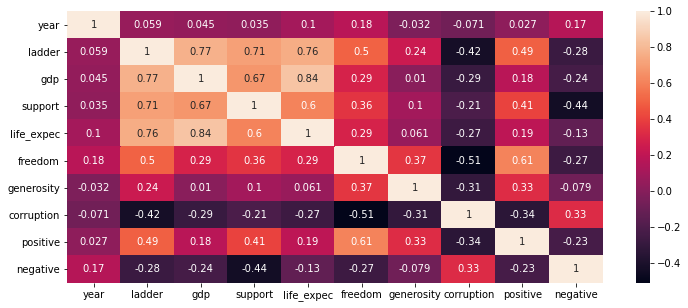

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_update2.corr(), annot=True)

In [22]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
feature_vars = df_update2.columns[3:11]
feature_vars

Index(['gdp', 'support', 'life_expec', 'freedom', 'generosity', 'corruption',
       'positive', 'negative'],
      dtype='object')

In [23]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, happy)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(X, happy)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X, happy)

In [9]:
sfs_forward.get_support()
feature_vars[sfs_forward.get_support()]

Index(['gdp', 'positive'], dtype='object')

In [33]:
sfs_backward.get_support()
feature_vars[sfs_backward.get_support()]

Index(['gdp', 'positive'], dtype='object')

Text(0, 0.5, 'Ladder')

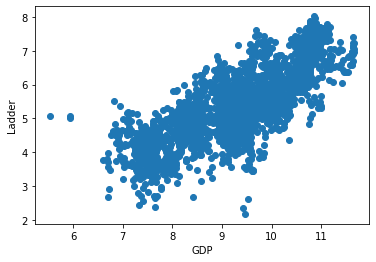

In [41]:
plt.scatter(df.iloc[:,3],df.iloc[:,2])
plt.xlabel('GDP')
plt.ylabel('Ladder')

Text(0, 0.5, 'Ladder')

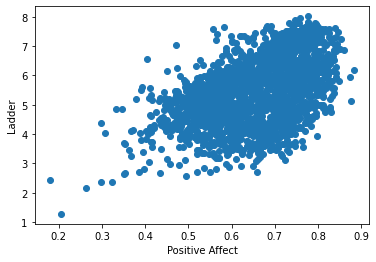

In [42]:
plt.scatter(df.iloc[:,9],df.iloc[:,2])
plt.xlabel('Positive Affect')
plt.ylabel('Ladder')

In [34]:
happy = np.array(df_update2.iloc[:,2]).reshape(-1,1)
#only keeping gdp and positive affect
X1 = np.array(df_update2.iloc[:,[3,9]])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,happy,test_size = 0.30)
model2 = LinearRegression().fit(X_train1,y_train1)

print(model2.score(X_train1,y_train1))
print(model2.score(X_test1, y_test1))


0.7313807143420885
0.7131189090970815


In [35]:
import statsmodels.api as sm
X = sm.add_constant(X)
modols = sm.OLS(happy, X)
results = modols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          1.18e-305
Time:                        09:23:58   Log-Likelihood:                -713.99
No. Observations:                 934   AIC:                             1446.
Df Residuals:                     925   BIC:                             1490.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8695      0.263    -14.732      0.0

In [12]:
import pycountry_convert as pc

def continent(name):
    part1 = pc.country_name_to_country_alpha2(name)
    code = pc.country_alpha2_to_continent_code(part1)
    continent = pc.convert_continent_code_to_continent_name(code)
    return continent



In [13]:
df_update2['Country'] = df_update2['Country'].replace({'Congo (Brazzaville)':'Congo'})
df_update2['Country'] = df_update2['Country'].replace({'Turkiye':'Turkey'})


<ipython-input-13-60e8efabf753>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update2['Country'] = df_update2['Country'].replace({'Congo (Brazzaville)':'Congo'})
<ipython-input-13-60e8efabf753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update2['Country'] = df_update2['Country'].replace({'Turkiye':'Turkey'})


In [14]:
df_update2['Continent'] = df_update2.apply(lambda row: continent(row.Country), axis=1)
df_update2

<ipython-input-14-ad5ac59345c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update2['Continent'] = df_update2.apply(lambda row: continent(row.Country), axis=1)


,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267,Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268,Asia
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273,Asia
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375,Asia
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179,Africa
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209,Africa
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224,Africa
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212,Africa


In [15]:
def cont_val(continent):
    continents = ['Asia', 'Africa', 'North America', 'South America', 'Oceania', 'Europe']
    return continents.index(continent)

In [16]:
df_update2['Continent'] = df_update2.apply(lambda row: cont_val(row.Continent), axis=1)

<ipython-input-16-231a6ff1e45a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update2['Continent'] = df_update2.apply(lambda row: cont_val(row.Continent), axis=1)


In [17]:
df_update2

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267,0
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268,0
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273,0
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375,0
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179,1
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209,1
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224,1
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212,1


In [18]:
df_update2.groupby('Continent').mean()

<ipython-input-18-d637ae701862>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_update2.groupby('Continent').mean()


,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
Continent,,,,,,,,,,
0,2014.977376,5.163498,9.200787,0.769339,63.831063,0.743348,0.022367,0.780480,0.585321,0.279814
1,2014.957746,4.259873,8.141653,0.714282,55.278404,0.708061,-0.035826,0.777939,0.643676,0.287925
2,2015.000000,6.360733,9.651078,0.857400,65.762778,0.843144,-0.001256,0.732611,0.785944,0.280444
3,2015.037500,6.165350,9.449250,0.866150,66.727250,0.790863,-0.086425,0.791775,0.756713,0.312200
4,2015.000000,7.280833,10.693333,0.947056,70.277778,0.928333,0.257222,0.327556,0.758278,0.197556
5,2015.028846,6.068609,10.322990,0.885519,68.333558,0.749365,-0.040247,0.726901,0.631109,0.254112


In [19]:
df_asia = df_update2.loc[(df_update2.Continent == 0)]
df_asia

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267,0
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268,0
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273,0
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375,0
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,Yemen,2013,4.218,8.166,0.694,58.480,0.543,-0.176,0.885,0.478,0.266,0
2161,Yemen,2014,3.968,8.159,0.638,58.440,0.664,-0.162,0.885,0.527,0.276,0
2162,Yemen,2015,2.983,7.772,0.669,58.400,0.610,-0.135,0.829,0.458,0.321,0
2165,Yemen,2018,3.058,7.444,0.789,57.725,0.553,-0.124,0.793,0.409,0.315,0


Score (Asia): 0.716568652226864


<ipython-input-45-f82a2343b5a9>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_asia.corr(), annot=True)


<AxesSubplot:>

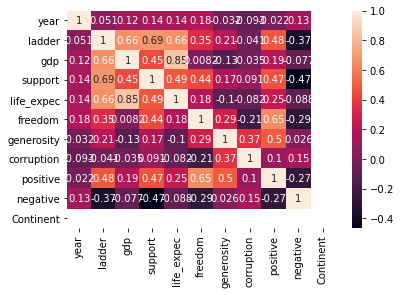

In [45]:
happy_Asia = np.array(df_asia.iloc[:,2]).reshape(-1,1)
X_Asia = np.array(df_asia.iloc[:,[3,4,5,6,7, 8, 9,10]])

model_Asia = LinearRegression().fit(X_Asia,happy_Asia)

print('Score (Asia):',model_Asia.score(X_Asia,happy_Asia))

feature_vars_Asia = df_asia.columns[3:11]

ridge_Asia = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_Asia, happy_Asia)
sfs_forward_Asia = SequentialFeatureSelector(
    ridge_Asia, n_features_to_select=2, direction="forward"
).fit(X_Asia, happy_Asia)

feature_vars_Asia[sfs_forward_Asia.get_support()]
sns.heatmap(df_asia.corr(), annot=True)


In [30]:
df_africa = df_update2.loc[(df_update2.Continent == 1)]
df_africa

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
183,Benin,2011,3.870,7.876,0.477,53.260,0.773,-0.142,0.849,0.574,0.219,1
184,Benin,2012,3.193,7.894,0.523,53.520,0.769,-0.111,0.806,0.563,0.231,1
185,Benin,2013,3.479,7.935,0.577,53.780,0.783,-0.085,0.856,0.646,0.216,1
186,Benin,2014,3.347,7.967,0.506,54.040,0.776,-0.095,0.855,0.558,0.273,1
187,Benin,2015,3.625,7.955,0.434,54.300,0.733,-0.026,0.850,0.555,0.373,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179,1
2192,Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209,1
2193,Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224,1
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212,1


Score (Africa): 0.20770127773573843


<ipython-input-44-27b10d73b5e0>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_africa.corr(), annot=True)


<AxesSubplot:>

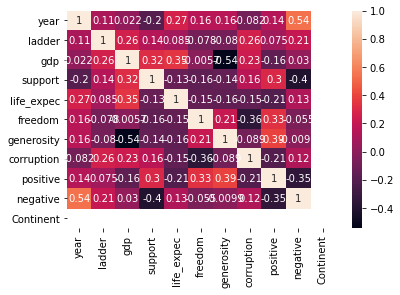

In [44]:
happy_Africa = np.array(df_africa.iloc[:,2]).reshape(-1,1)
X_Africa = np.array(df_africa.iloc[:,[3,4,5,6,7, 8, 9,10]])

model_Africa = LinearRegression().fit(X_Africa,happy_Africa)

print('Score (Africa):',model_Africa.score(X_Africa,happy_Africa))

feature_vars_Africa = df_africa.columns[3:11]

ridge_Africa = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_Africa, happy_Africa)
sfs_forward_Af = SequentialFeatureSelector(
    ridge_Africa, n_features_to_select=2, direction="forward"
).fit(X_Africa, happy_Africa)

feature_vars_Africa[sfs_forward_Af.get_support()]
sns.heatmap(df_africa.corr(), annot=True)

In [33]:
df_north = df_update2.loc[(df_update2.Continent == 2)]
df_north

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
332,Canada,2011,7.426,10.733,0.922,70.860,0.951,0.249,0.433,0.803,0.248,2
333,Canada,2012,7.415,10.739,0.948,70.920,0.918,0.286,0.466,0.776,0.229,2
334,Canada,2013,7.594,10.752,0.936,70.980,0.916,0.312,0.406,0.801,0.263,2
335,Canada,2014,7.304,10.770,0.918,71.040,0.939,0.266,0.442,0.791,0.259,2
336,Canada,2015,7.413,10.769,0.939,71.100,0.931,0.249,0.427,0.792,0.286,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2080,United States,2015,6.864,10.976,0.904,66.600,0.849,0.215,0.698,0.769,0.275,2
2081,United States,2016,6.804,10.985,0.897,66.475,0.758,0.140,0.739,0.737,0.264,2
2082,United States,2017,6.992,11.001,0.921,66.350,0.868,0.193,0.681,0.755,0.268,2
2083,United States,2018,6.883,11.024,0.904,66.225,0.825,0.112,0.710,0.757,0.292,2


Score (North America): 0.6688181492402889
Index(['support', 'life_expec'], dtype='object')


<ipython-input-46-b83e3f67f531>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_north.corr(), annot=True)


<AxesSubplot:>

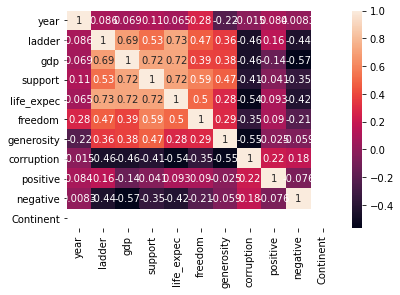

In [46]:
happy_N = np.array(df_north.iloc[:,2]).reshape(-1,1)
X_N = np.array(df_north.iloc[:,[3,4,5,6,7, 8, 9,10]])

model_N = LinearRegression().fit(X_N,happy_N)

print('Score (North America):',model_N.score(X_N,happy_N))

feature_vars_N = df_north.columns[3:11]

ridge_N = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_N, happy_N)
sfs_forward_N = SequentialFeatureSelector(
    ridge_N, n_features_to_select=2, direction="forward"
).fit(X_N, happy_N)

print(feature_vars_N[sfs_forward_N.get_support()])
sns.heatmap(df_north.corr(), annot=True)

In [36]:
df_south = df_update2.loc[(df_update2.Continent == 3)]
df_south

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
48,Argentina,2011,6.776,10.112,0.889,66.420,0.816,-0.178,0.755,0.769,0.232,3
49,Argentina,2012,6.468,10.091,0.902,66.540,0.747,-0.151,0.817,0.744,0.272,3
50,Argentina,2013,6.582,10.103,0.910,66.660,0.737,-0.134,0.823,0.766,0.254,3
51,Argentina,2014,6.671,10.067,0.918,66.780,0.745,-0.168,0.854,0.769,0.238,3
52,Argentina,2015,6.697,10.083,0.926,66.900,0.881,-0.178,0.851,0.768,0.305,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2130,Venezuela,2015,5.569,8.532,0.911,65.100,0.512,-0.086,0.813,0.837,0.223,3
2131,Venezuela,2016,4.041,7.602,0.902,64.925,0.458,-0.056,0.890,0.676,0.392,3
2132,Venezuela,2017,5.071,5.943,0.896,64.750,0.636,0.054,0.844,0.697,0.363,3
2133,Venezuela,2018,5.006,5.935,0.887,64.575,0.611,0.072,0.828,0.723,0.374,3


Score (South America): 0.7756065604648097
Index(['gdp', 'negative'], dtype='object')


<ipython-input-47-b0caa68f5b92>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_south.corr(), annot=True)


<AxesSubplot:>

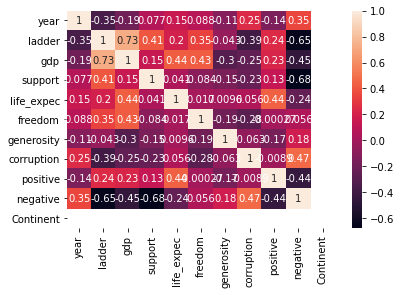

In [47]:
happy_S = np.array(df_south.iloc[:,2]).reshape(-1,1)
X_S = np.array(df_south.iloc[:,[3,4,5,6,7, 8, 9,10]])

model_S = LinearRegression().fit(X_S,happy_S)

print('Score (South America):',model_S.score(X_S,happy_S))

feature_vars_S = df_south.columns[3:11]

ridge_S = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_S, happy_S)
sfs_forward_S = SequentialFeatureSelector(
    ridge_S, n_features_to_select=2, direction="forward"
).fit(X_S, happy_S)

print(feature_vars_S[sfs_forward_S.get_support()])
sns.heatmap(df_south.corr(), annot=True)

In [28]:
df_oceania = df_update2.loc[(df_update2.Continent == 4)]
df_oceania

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
80,Australia,2011,7.406,10.723,0.967,70.280,0.945,0.366,0.382,0.724,0.195,4
81,Australia,2012,7.196,10.744,0.945,70.360,0.935,0.270,0.368,0.728,0.214,4
82,Australia,2013,7.364,10.752,0.928,70.440,0.933,0.265,0.432,0.770,0.177,4
83,Australia,2014,7.289,10.763,0.924,70.520,0.923,0.315,0.442,0.740,0.245,4
84,Australia,2015,7.309,10.770,0.952,70.600,0.922,0.328,0.357,0.750,0.210,4
85,Australia,2016,7.250,10.781,0.942,70.675,0.922,0.235,0.399,0.736,0.236,4
86,Australia,2017,7.257,10.787,0.950,70.750,0.911,0.314,0.411,0.728,0.225,4
87,Australia,2018,7.177,10.801,0.940,70.825,0.916,0.143,0.405,0.706,0.187,4
88,Australia,2019,7.234,10.807,0.943,70.900,0.918,0.117,0.430,0.727,0.202,4
1400,New Zealand,2011,7.191,10.549,0.954,69.820,0.935,0.279,0.269,0.784,0.210,4


In [39]:
df_europe = df_update2.loc[(df_update2.Continent == 5)]
df_europe

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
17,Albania,2011,5.867,9.311,0.759,67.88,0.487,-0.206,0.877,0.566,0.257,5
18,Albania,2012,5.510,9.326,0.785,68.16,0.602,-0.170,0.848,0.553,0.271,5
19,Albania,2013,4.551,9.338,0.759,68.44,0.632,-0.129,0.863,0.541,0.338,5
20,Albania,2014,4.814,9.358,0.626,68.72,0.735,-0.026,0.883,0.573,0.335,5
21,Albania,2015,4.607,9.383,0.639,69.00,0.704,-0.082,0.885,0.579,0.350,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2063,United Kingdom,2015,6.515,10.713,0.936,69.70,0.833,0.296,0.456,0.740,0.219,5
2064,United Kingdom,2016,6.824,10.727,0.954,69.80,0.821,0.246,0.458,0.732,0.230,5
2065,United Kingdom,2017,7.103,10.744,0.937,69.90,0.813,0.286,0.419,0.712,0.210,5
2066,United Kingdom,2018,7.233,10.755,0.928,70.00,0.838,0.221,0.404,0.736,0.228,5


Score (Europe): 0.821323754767325
Index(['corruption', 'positive'], dtype='object')


<ipython-input-48-36a3e22fa7fa>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_europe.corr(), annot=True)


<AxesSubplot:>

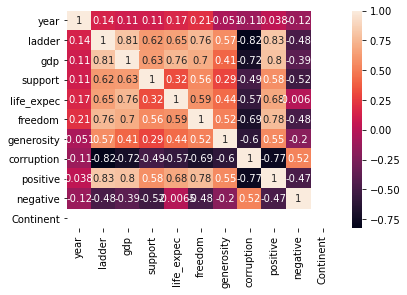

In [48]:
happy_E = np.array(df_europe.iloc[:,2]).reshape(-1,1)
X_E = np.array(df_europe.iloc[:,[3,4,5,6,7, 8, 9,10]])

model_E = LinearRegression().fit(X_E,happy_E)

print('Score (Europe):',model_E.score(X_E,happy_E))

feature_vars_E = df_north.columns[3:11]

ridge_E = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_E, happy_E)
sfs_forward_E = SequentialFeatureSelector(
    ridge_E, n_features_to_select=2, direction="forward"
).fit(X_E, happy_E)

print(feature_vars_E[sfs_forward_E.get_support()])
sns.heatmap(df_europe.corr(), annot=True)